In [ ]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# Приложения из Google Play Store

In [ ]:

url = "https://raw.githubusercontent.com/suvorova19/top_1/master/googleplaystore.csv"
data = pd.read_csv(url)

Таблица содержит приложения из Google Play Store,полученные из Интернета данные о 10 тысячах приложений из Play Store для анализа рынка Android.Будем смотреть какой категории/жанра приложение. 

Посмотрим на размер таблицы

In [ ]:
data.shape

(10841, 13)

Выведем первые 5 строк таблицы

In [ ]:

data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Выведем последние 5 строк таблицы

In [ ]:
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


Выведем имена признаков(столбцов)

In [ ]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

App - приложение

Category - категория

Rating - рейтинг

Reviews - отзывы

Size- размер 

Installs - установки 

Type - тип

Price - цена

Content Rating - рейтинг содержания 

Genres - жанры

Last Updater - последнее обновление

Current Ver- текущая версия

Android Ver - версия андройда 

Признаки 'App','Category','Type','Genres','Content Rating','Current Ver','Android Ver','Last Updater'- категориальные

Признаки Size,Price,Installs,Reviews,Rating - числовые

In [ ]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
for item in ['App','Category','Type','Genres','Content Rating','Current Ver','Android Ver','Last Updated']:
  data[item] = data[item].astype('category');

Признак size числовой, но имеет тип 'Object'.Уберем M, что означает мегабайты, после записи чисел и заменим Varies with device(зависит от устройства) на пустую строку на float.

In [ ]:
data['Size']=data['Size'].str.replace('Varies with device',' ')

In [ ]:
data['Size']=data['Size'].str.replace('M','')

In [ ]:
data['Size'] = pd.to_numeric(data['Size'], errors='coerce')

Признак price числовой, но имеет тип 'Object'. Уберем $ и заменим тип на float.

In [ ]:
data['Price']=data['Price'].str.replace('$','')
data['Price']=data['Price'].str.replace('Everyone','0')
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

Признак 'Installs'  числовой, но имеет тип 'Object'. Так же в записи присутствуют запятые и плюс. Поэтому уберём запятые и плюсы и заменим тип на float

In [ ]:
data['Installs']=data['Installs'].str.replace(',','')
data['Installs']=data['Installs'].str.replace('+','')
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')

Признак reviews числовой, но имеет тип 'Object'.Заменим тип на float.

In [ ]:
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')


In [ ]:
data.dtypes

App               category
Category          category
Rating             float64
Reviews            float64
Size               float64
Installs           float64
Type              category
Price              float64
Content Rating    category
Genres            category
Last Updated      category
Current Ver       category
Android Ver       category
dtype: object

# Визуализация и описательная статистика.

Визуализация и описательная статистика - важные этапы анализа данных. Сводную информацию о признаках можем получить, вызвав метод describe:

In [ ]:
data.describe()

,Rating,Reviews,Size,Installs,Price
count,9367.000000,1.084000e+04,8829.000000,1.084000e+04,10841.000000
mean,4.193338,4.441529e+05,22.270540,1.546434e+07,1.027273
std,0.537431,2.927761e+06,22.628691,8.502936e+07,15.948971
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,5.400000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,14.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,31.000000,5.000000e+06,0.000000
max,19.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

По умолчанию этот метод дает информацию только о количественных признаках. Получим информацию о категориальных:

In [ ]:
data.describe(include=['category'])

,App,Category,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10840,10840,10841,10841,10833,10838
unique,9660,34,3,6,120,1378,2832,33
top,ROBLOX,FAMILY,Free,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,10039,8714,842,326,1459,2451


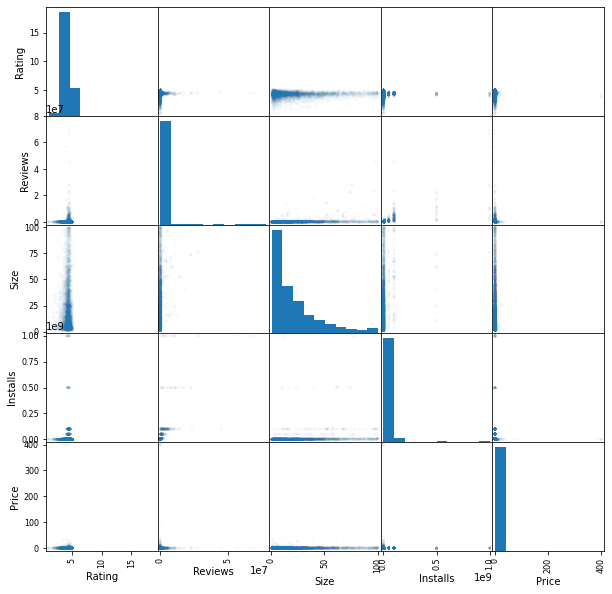

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

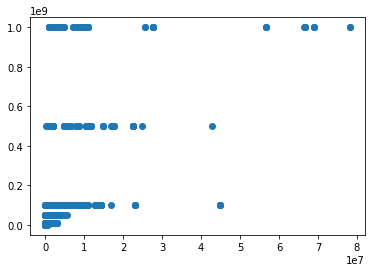

In [ ]:
plt.scatter(x='Reviews', y='Installs', data=data)
pass

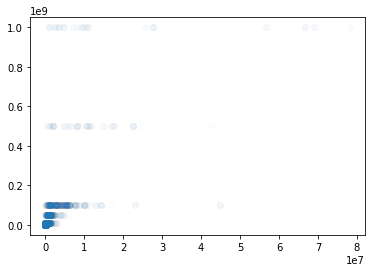

In [ ]:
plt.scatter(data['Reviews'], data['Installs'], alpha=0.01)
pass

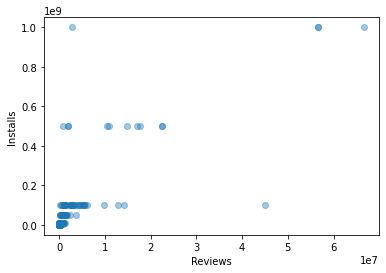

In [ ]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
plt.scatter(data.iloc[random_subset]['Reviews'], data.iloc[random_subset]['Installs'], alpha=0.4)
plt.xlabel('Reviews')
plt.ylabel('Installs')
pass

колличество установок и рейтинг

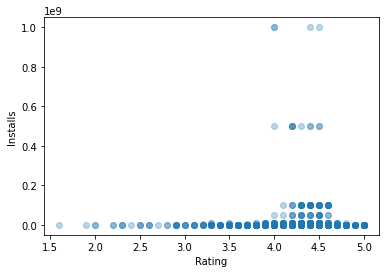

In [ ]:
plt.scatter(data.iloc[random_subset]['Rating'], data.iloc[random_subset]['Installs'], alpha = .3)
plt.xlabel('Rating')
plt.ylabel('Installs')
pass

отзовы и рейтинг

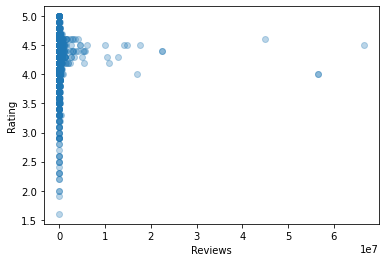

In [ ]:
plt.scatter(data.iloc[random_subset]['Reviews'], data.iloc[random_subset]['Rating'], alpha = .3)
plt.xlabel('Reviews')
plt.ylabel('Rating')
pass

установки и цена

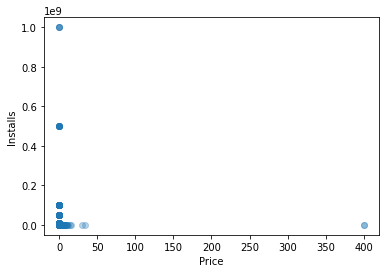

In [ ]:
plt.scatter(data.iloc[random_subset]['Price'], data.iloc[random_subset]['Installs'], alpha = .3)
plt.xlabel('Price')
plt.ylabel('Installs')
pass

Ящик с усами

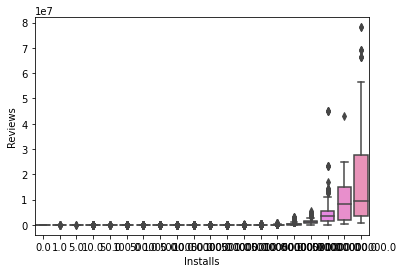

In [ ]:
sns.boxplot(x="Installs", y="Reviews", data=data)
pass

Диаграмма типов приложений(платные/бесплатные)

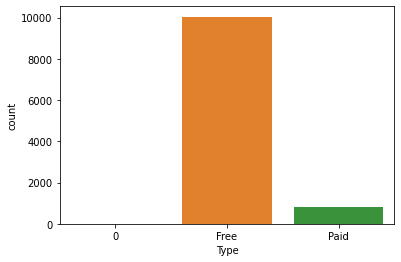

In [ ]:
sns.countplot(x='Type', data=data)
pass

Возрастной рейтинг приложений(колличество по группам)

In [ ]:
data['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

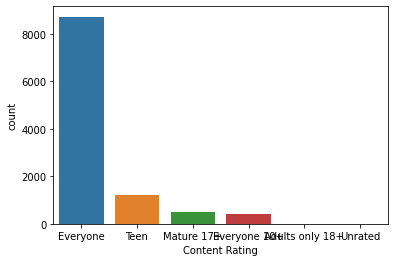

In [ ]:
sns.countplot(x='Content Rating', order=data['Content Rating'].value_counts().index, data=data)
pass

Диаграмма категории/жанра

In [ ]:
data['Genres'].value_counts()

Tools                       842
Entertainment               623
Education                   549
Medical                     463
Business                    460
                           ... 
Comics;Creativity             1
Strategy;Education            1
Communication;Creativity      1
Strategy;Creativity           1
Role Playing;Education        1
Name: Genres, Length: 120, dtype: int64

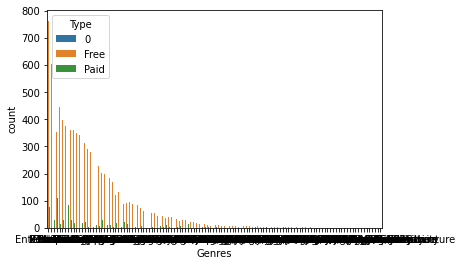

In [ ]:
sns.countplot(x='Genres', order=data['Genres'].value_counts().index, hue='Type', data=data)
pass

Корреляционная матрица

In [ ]:
corr_mat = data.corr()
corr_mat

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068141,0.075788,0.051355,-0.021176
Reviews,0.068141,1.000000,0.237280,0.643122,-0.009667
Size,0.075788,0.237280,1.000000,0.162557,-0.022455
Installs,0.051355,0.643122,0.162557,1.000000,-0.011689
Price,-0.021176,-0.009667,-0.022455,-0.011689,1.000000


In [ ]:
corr_mat > 0.5

,Rating,Reviews,Size,Installs,Price
Rating,True,False,False,False,False
Reviews,False,True,False,True,False
Size,False,False,True,False,False
Installs,False,True,False,True,False
Price,False,False,False,False,True


Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции:

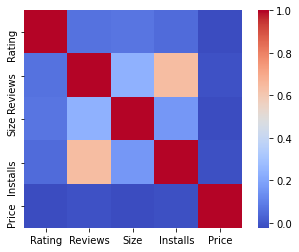

In [ ]:

sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Видна небольшая корреляция отзывов и установок

# Заполнение пропущенных значений

In [ ]:
data.dtypes

App               category
Category          category
Rating             float64
Reviews            float64
Size               float64
Installs           float64
Type              category
Price              float64
Content Rating    category
Genres            category
Last Updated      category
Current Ver       category
Android Ver       category
dtype: object

In [ ]:
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              1
Size              2012
Installs             1
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)

In [ ]:
data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [ ]:
data = data.dropna(subset=['Type'])

In [ ]:
data = data.dropna(subset=['Content Rating'])

In [ ]:
data = data.dropna(subset=['Current Ver'])

In [ ]:
data = data.dropna(subset=['Android Ver'])

In [ ]:
data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
data.shape

(10829, 13)

In [ ]:
data.describe()

,Rating,Reviews,Size,Installs,Price
count,10829.000000,1.082900e+04,10829.000000,1.082900e+04,10829.000000
mean,4.206510,4.446018e+05,20.746597,1.547990e+07,1.028091
std,0.480467,2.929213e+06,20.680859,8.507114e+07,15.957778
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,6.800000,5.000000e+03,0.000000
50%,4.300000,2.100000e+03,14.000000,1.000000e+05,0.000000
75%,4.500000,5.481500e+04,26.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [ ]:
data.describe(include=['category'])

,App,Category,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10829,10829,10829,10829,10829,10829,10829,10829
unique,9648,33,2,6,119,1376,2831,33
top,ROBLOX,FAMILY,Free,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1968,10032,8704,840,326,1458,2451


# Векторизация.

In [ ]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'category']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'category']
print('categorical_columns=', categorical_columns)
print('numerical_columns=', numerical_columns)

categorical_columns= ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
numerical_columns= ['Rating', 'Reviews', 'Size', 'Installs', 'Price']


In [ ]:
categorical_columns_exept_category= ['App', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

In [ ]:

data_describe = data.describe(include=['category'])
binary_columns    = [c for c in categorical_columns_exept_category if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns_exept_category if data_describe[c]['unique'] > 2]
print('binary_columns=', binary_columns)
print('nonbinary_columns=', nonbinary_columns)

binary_columns= ['Type']
nonbinary_columns= ['App', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [ ]:
data['Type'] = pd.factorize(data['Type'])[0]

Применим метод бинаризации (one-hot encoding)

In [ ]:
data_categorical = pd.get_dummies(data[nonbinary_columns])
print(data_categorical.columns)

Index(['App_"i DT" Fútbol. Todos Somos Técnicos.',
       'App_+Download 4 Instagram Twitter', 'App_- Free Comics - Comic Apps',
       'App_.R', 'App_/u/app', 'App_058.ba', 'App_1. FC Köln App',
       'App_10 Best Foods for You', 'App_10 Minutes a Day Times Tables',
       'App_10 WPM Amateur ham radio CW Morse code trainer',
       ...
       'Android Ver_5.0 - 7.1.1', 'Android Ver_5.0 - 8.0',
       'Android Ver_5.0 and up', 'Android Ver_5.1 and up',
       'Android Ver_6.0 and up', 'Android Ver_7.0 - 7.1.1',
       'Android Ver_7.0 and up', 'Android Ver_7.1 and up',
       'Android Ver_8.0 and up', 'Android Ver_Varies with device'],
      dtype='object', length=14029)


# Нормализация.

In [ ]:
numerical_columns=['Rating', 'Reviews', 'Size', 'Installs', 'Price' ]

In [ ]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Rating,Reviews,Size,Installs,Price
count,10829.000000,1.082900e+04,10829.000000,1.082900e+04,10829.000000
mean,4.206510,4.446018e+05,20.746597,1.547990e+07,1.028091
std,0.480467,2.929213e+06,20.680859,8.507114e+07,15.957778
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,6.800000,5.000000e+03,0.000000
50%,4.300000,2.100000e+03,14.000000,1.000000e+05,0.000000
75%,4.500000,5.481500e+04,26.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [ ]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [ ]:
data_numerical.describe()

,Rating,Reviews,Size,Installs,Price
count,1.082900e+04,1.082900e+04,1.082900e+04,1.082900e+04,1.082900e+04
mean,-2.815988e-13,5.663410e-17,2.268279e-15,-7.693157e-16,1.081004e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-6.673733e+00,-1.517820e-01,-9.548248e-01,-1.819642e-01,-6.442571e-02
25%,-2.216806e-01,-1.517690e-01,-6.743722e-01,-1.819054e-01,-6.442571e-02
50%,1.945808e-01,-1.510650e-01,-3.262242e-01,-1.807887e-01,-6.442571e-02
75%,6.108422e-01,-1.330687e-01,2.540225e-01,-1.231899e-01,-6.442571e-02
max,1.651496e+00,2.653057e+01,3.832210e+00,1.157290e+01,2.500172e+01


# Соединяем все в одну таблицу.

In [ ]:
data = pd.concat((data['Category'], data_numerical, data_categorical), axis = 1)
print(data.shape)

(10829, 14035)


In [ ]:
data.describe()

,Rating,Reviews,Size,Installs,Price,"App_""i DT"" Fútbol. Todos Somos Técnicos.",App_+Download 4 Instagram Twitter,App_- Free Comics - Comic Apps,App_.R,App_/u/app,App_058.ba,App_1. FC Köln App,App_10 Best Foods for You,App_10 Minutes a Day Times Tables,App_10 WPM Amateur ham radio CW Morse code trainer,"App_10,000 Quotes DB (Premium)",App_100 Doors of Revenge,App_100+ C Programs,"App_100000+ Messages - DP, Status, Jokes & GIF 2018",App_101 C Programming Problems,"App_104 Looking for a job - looking for a job, looking for a job, looking for a part-time job, health checkup, resume, treatment room",App_11st,App_12 Step Meditations & Sober Prayers AA NA AL-ANON,App_14thStreetVet,App_17th Edition Cable Sizer,App_1800 Contacts - Lens Store,App_1LINE – One Line with One Touch,App_1st Fed CI Mobile Banking,App_2 Amateur ham radio CW Morse code practice keys TX,App_2-Player Co-op Zombie Shoot,App_20 Minuten (CH),App_20 minutes (CH),App_2000 AD Comics and Judge Dredd,App_2017 BN SM Sales Conference,App_2017 EMRA Antibiotic Guide,App_2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,App_2019 Tricks Es File Explores,App_2048 BTS J Hope KPop Puzzle Game,App_2048(AI),App_20WPM Amateur ham radio Koch CW Morse code trainer,...,Current Ver_v67_slk3.0_20180115_01,Current Ver_v7.0.02.3.0516.1_06_0713,Current Ver_v7.0.7.1.0625.1_06_0629,Current Ver_v7.0.9.1.0526.1_06_0704,Current Ver_v8.0.1.8.0629.1,Current Ver_v8[1.0.10],Current Ver_version 0.994,Android Ver_1.0 and up,Android Ver_1.5 and up,Android Ver_1.6 and up,Android Ver_2.0 and up,Android Ver_2.0.1 and up,Android Ver_2.1 and up,Android Ver_2.2 - 7.1.1,Android Ver_2.2 and up,Android Ver_2.3 and up,Android Ver_2.3.3 and up,Android Ver_3.0 and up,Android Ver_3.1 and up,Android Ver_3.2 and up,Android Ver_4.0 and up,Android Ver_4.0.3 - 7.1.1,Android Ver_4.0.3 and up,Android Ver_4.1 - 7.1.1,Android Ver_4.1 and up,Android Ver_4.2 and up,Android Ver_4.3 and up,Android Ver_4.4 and up,Android Ver_4.4W and up,Android Ver_5.0 - 6.0,Android Ver_5.0 - 7.1.1,Android Ver_5.0 - 8.0,Android Ver_5.0 and up,Android Ver_5.1 and up,Android Ver_6.0 and up,Android Ver_7.0 - 7.1.1,Android Ver_7.0 and up,Android Ver_7.1 and up,Android Ver_8.0 and up,Android Ver_Varies with device
count,1.082900e+04,1.082900e+04,1.082900e+04,1.082900e+04,1.082900e+04,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,...,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000,10829.000000
mean,-2.815988e-13,5.663410e-17,2.268279e-15,-7.693157e-16,1.081004e-16,0.000092,0.000092,0.000092,0.000092,0.000092,0.000092,0.000092,0.000185,0.000092,0.000092,0.000092,0.000092,0.000092,0.000092,0.000092,0.000092,0.000092,0.000092,0.000092,0.000092,0.000185,0.000092,0.000092,0.000092,0.000092,0.000092,0.000092,0.000092,0.000092,0.000185,0.000092,0.000092,0.000092,0.000092,0.000092,...,0.000092,0.000092,0.000092,0.000092,0.000092,0.000092,0.000092,0.000185,0.001755,0.010620,0.002863,0.000646,0.012374,0.000092,0.022532,0.060116,0.025949,0.022163,0.000923,0.003324,0.126789,0.000185,0.138609,0.000092,0.226337,0.036291,0.022440,0.090498,0.001108,0.000092,0.000092,0.000185,0.055499,0.002216,0.005541,0.000092,0.00

# X и Y отбор признаков

Будем использовать все входные признаки для классификации приложений по цене.

In [ ]:
X = data.drop('Category', axis = 1) 
y = data['Category']

In [ ]:
print(X.shape)
print(y.shape)

(10829, 14034)
(10829,)


# Разбиваем на обучающую и тестовую выборки.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape[0], X_test.shape[0])

7580 3249


# kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

In [ ]:
err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.10514511873350924 0.15297014465989536


In [ ]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 5, 10, 15, 20, 25, 30, 40, 50]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.14643799472295504 15


Оптимальное значение соседей =15

In [ ]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.10923482849604221 0.14804555247768544


##**Практическая рабта №2**

##**PCA**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
principal_components

array([[-0.30383278,  0.10734   ],
       [-0.39037008,  0.50461632],
       [-0.15471039, -0.26051761],
       ...,
       [-0.339625  ,  0.22048233],
       [-0.0743933 , -0.16603293],
       [ 0.10017273, -0.22335122]])

In [ ]:
pca_X = pd.DataFrame(data=principal_components,
                     columns = ['principal_component_1', 'principal_component_2'])
pca_X.head()

,principal_component_1,principal_component_2
0,-0.303833,0.107340
1,-0.390370,0.504616
2,-0.154710,-0.260518
3,0.429292,-0.478621
4,-0.375708,0.402856


In [ ]:
final_data = pd.concat([pca_X, y], axis=1)
final_data.head()

,principal_component_1,principal_component_2,Category
0,-0.303833,0.107340,ART_AND_DESIGN
1,-0.390370,0.504616,ART_AND_DESIGN
2,-0.154710,-0.260518,ART_AND_DESIGN
3,0.429292,-0.478621,ART_AND_DESIGN
4,-0.375708,0.402856,ART_AND_DESIGN


In [ ]:
categ=['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9']
#34

In [ ]:
col=['mediumorchid', 'blueviolet', 'navy','maroon','chocolate', 'royalblue','orchid','indigo','tomato','linen', 'darkslategrey','cyan','darkmagenta', 'limegreen', 'darkgreen', 'yellow','purple', 'darkorange','salmon', 'red','grey','coral','olive','green','pink','gold','c','m','g','y','b','r','teal','peru']

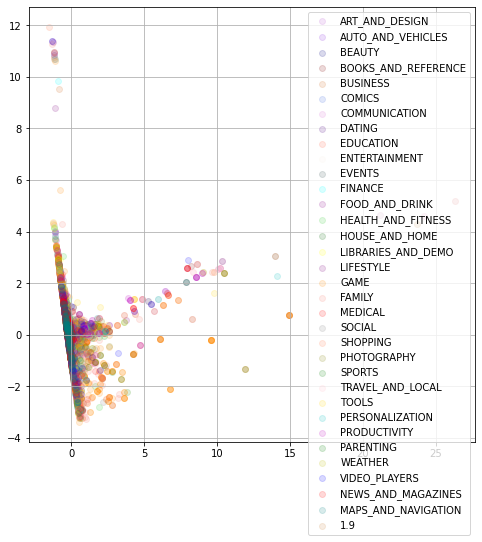

In [ ]:
plt.figure(figsize = (8, 8))
 
for i in range(len(categ)):
  plt.scatter(final_data[final_data['Category'] == categ[i]]['principal_component_1'],
            final_data[final_data['Category'] == categ[i]]['principal_component_2'],
            alpha = 0.15,
            label = categ[i],
            color = col[i])
  plt.legend()
plt.grid()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size = 0.3, random_state = 42)

print(X_train.shape[0], X_test.shape[0])


7580 3249


In [ ]:

best_n_neighbors=15

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)


0.7138522427440633 0.804247460757156


In [ ]:
err_pca_train = []
err_pca_test = []

In [ ]:
errors = []
for n in range(1, 10):
    pca = PCA(n_components=n)
    pca_X = pca.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size = 0.3, random_state = 42)
    
    knn = KNeighborsClassifier(n_neighbors = 2).fit(X_train, y_train)
    err_train = np.mean(y_train != knn.predict(X_train))
    err_test  = np.mean(y_test  != knn.predict(X_test))
    
    err_pca_train.append(err_train)
    err_pca_test.append(err_test)
    errors.append([err_train, err_test])

print(errors)


[[0.399868073878628, 0.8202523853493383], [0.3686015831134565, 0.7867036011080333], [0.35897097625329816, 0.7614650661742074], [0.35395778364116093, 0.7491535857186826], [0.3633245382585752, 0.7442289935364728], [0.345910290237467, 0.7183748845798708], [0.33773087071240104, 0.7051400430901816], [0.34195250659630605, 0.7029855340104647], [0.33839050131926124, 0.7014465989535241]]


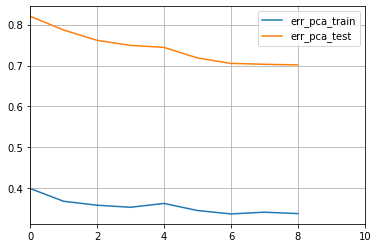

In [ ]:
plt.plot(err_pca_train, label='err_pca_train')
plt.plot(err_pca_test, label='err_pca_test')
plt.legend()
plt.grid()
plt.xlim(0, 10)
plt.show()

In [ ]:

print(err_pca_test.index(min(err_pca_test)), min(err_pca_test))
print(len(err_pca_test))

8 0.7014465989535241
9


# **LDA**

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape[0], X_test.shape[0])


7580 3249


In [68]:
from sklearn import discriminant_analysis
lda_model = discriminant_analysis.LinearDiscriminantAnalysis().fit(X_train, y_train)
y_train_pred = lda_model.predict(X_train)
y_test_pred  = lda_model.predict(X_test)
print (np.mean(y_train_pred != y_train))
print (np.mean(y_test_pred  != y_test))

0.006728232189973615
0.7974761465066175


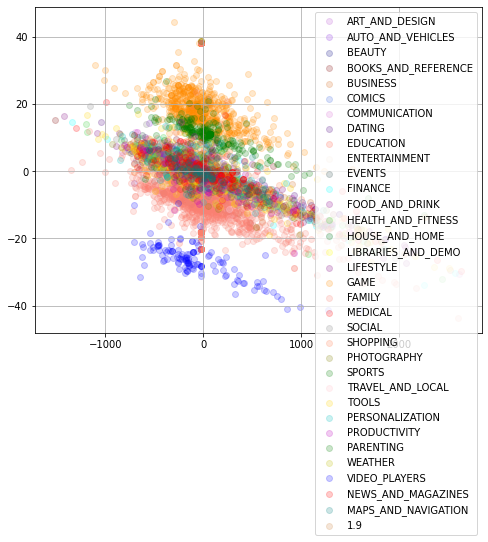

In [69]:
lda_model = discriminant_analysis.LinearDiscriminantAnalysis(n_components = 2)
lda_model.fit(X_test, y_test)
X_lda = lda_model.transform(X_train)
plt.figure(figsize = (8, 6))
for i in range(len(categ)):
    plt.scatter(X_lda[y_train ==categ[i], 0], X_lda[y_train ==categ[i], 1], 
                color = col[i], label =categ[i], alpha = 0.2)
plt.legend()
plt.grid()
pass



In [ ]:

lda_model = discriminant_analysis.LinearDiscriminantAnalysis(n_components = 2).fit(X_train, y_train)
X_train_lda = lda_model.transform(X_train)
X_test_lda  = lda_model.transform(X_test)
lda_model = discriminant_analysis.LinearDiscriminantAnalysis().fit(X_train_lda, y_train)
y_train_pred = lda_model.predict(X_train_lda)
y_test_pred  = lda_model.predict(X_test_lda)
print ( np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.05567282321899736 0.8371806709756848
